In [2]:
import numpy as np
from pgmpy.inference.ExactInference import VariableElimination
from plotly.subplots import make_subplots

import inf_cutset_conditioning.cutset_cond_algs_learn_ar_change_noo2sat as cca_ar_change_noo2sat
import inference.helpers as ih
import models.builders as mb
import tests.data_factory as data

In [3]:
df_mock = data.get_mock_data("changing")
height, age, sex = df_mock.iloc[0][["Height", "Age", "Sex"]]
n_days = df_mock.shape[0]
assert n_days == 3

# Model parameters
ar_prior = "uniform"
ar_change_cpt_suffix = "_shape_factor_identity"
ecfev1_noise_model_suffix = "_std_add_mult_ecfev1"

# Load n days model with variable elimination
(
    model_n_ar,
    HFEV1_n_ar,
    AR_vars,
    uecFEV1_vars,
    ecFEV1_vars,
    ecFEF2575prctecFEV1_vars,
) = mb.fev1_fef2575_n_days_model_noise_shared_healthy_vars_and_temporal_ar(
    n_days,
    height,
    age,
    sex,
    ar_prior,
    ar_change_cpt_suffix,
    ecfev1_noise_model_suffix,
    light=False,
)

AR change cpt shape: (45, 45, 1)
Taking idx -1 for the shape cpt


In [4]:
model_n_ar.check_model()

True

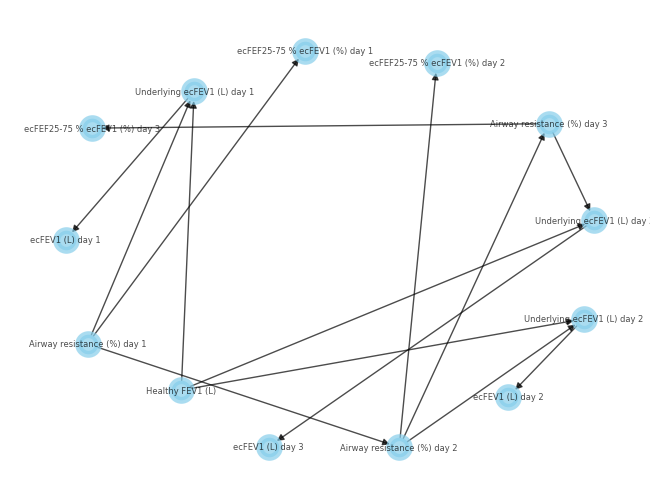

In [5]:
import networkx as nx
# Create a directed graph from the model edges
nx_graph = nx.DiGraph(model_n_ar.edges())

# Use spring layout for better spacing between nodes
pos = nx.spring_layout(nx_graph, k=10)  # Adjust k for more/less space between nodes

# Draw the graph with specified layout and font size
nx.draw(
    nx_graph,
    pos,
    with_labels=True,
    node_size=200,
    node_color="skyblue",
    # node_shape="o",
    alpha=0.7,
    linewidths=5,
    font_size=6,  # Reduce font size for node labels
)